# Statistical Power

## Introduction


We've started to investigate hypothesis testing, p-values and their use for accepting or rejecting the null hypothesis. Building upon this, we can develop a concept of the power of a statistical test, as the test's ability to detect a difference, when one exists. In the case of our coin flipping example, the power of our statistical test would be the probability of rejecting the null hypothesis "this coin is fair" when the coin was unfair. As you might assume, the power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## The Power of a Statistical Test

The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test therefore ranges from 0 to 1, with 1 being a perfect test that gaurantees rejecting the null hypothesis when it is indeed false.

With that, let's recreate our previous coin flip simulation, and use it to plot some relationships between power, sample size, and our p-value cutoff.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0.5
1.0 0.8413447460685429
0

3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
1.0 0.8413447460685429
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
3.0 0.9986501019683699
0.8660254037844386
1.0 0.8413447460685429
0.866025403

4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
0.0 0.5
1.224744871391589
0.0 0.5
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
2.0 0.9772498680518208
1.224744871391589
6.0 0.9999999990134123
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0.9999683287581669
1.224744871391589
4.0 0

5.0 0.9999997133484281
1.3228756555322954
7.0 0.9999999999987201
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
3.0 0.9986501019683699
1.3228756555322954
3.0 0.9986501019683699
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
3.0 0.9986501019683699
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
7.0 0.9999999999987201
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
5.0 0.9999997133484281
1.3228756555322954
1.0 0.8413447460685429
1.3228756555322954
3.0 0.9986501019683699
1.3228756555322954
7.0 0.9999999999987201
1.322875655

3.0 0.9986501019683699
1.5
9.0 1.0
1.5
9.0 1.0
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
1.0 0.8413447460685429
1.5
7.0 0.9999999999987201
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
3.0 0.9986501019683699
1.5
7.0 0.9999999999987201
1.5
1.0 0.8413447460685429
1.5
1.0 0.8413447460685429
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
3.0 0.9986501019683699
1.5
7.0 0.9999999999987201
1.5
7.0 0.9999999999987201
1.5
9.0 1.0
1.5
3.0 0.9986501019683699
1.5
7.0 0.9999999999987201
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
5.0 0.9999997133484281
1.5
7.0 0.9999999999987201
1.5
5.0 0.9999997133484281
1.5
3.0 0.9986501019683699
1.5
1.0 0.8413447460685429
1.5
3.0 0.9986501019683699
1.5
5.0 0.9999997133484281
1.5
3.0 0.9986501019683699
1.5
9.0 1.0
1.5
3.0 0.9986501019683699
1.5
7.0 0.9999999999987201
1.5
5.0 0.9999997133484281
1.5
1.0 0.8413447460685429
1.5
7.0 0.9999999999987201
1.5
5.0 0.9999997133484281
1.5
5.0 0.9

4.0 0.9999683287581669
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
2.0 0.9772498680518208
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
2.0 0.9772498680518208
1.5811388300841898
2.0 0.9772498680518208
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
4.0 0.9999683287581669
1.5811388300841898
8.0 0.9999999999999993
1.5811388300841898
8.0 0.9999999999999993
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
2.0 0.9772498680518208
1.5811388300841898
4.0 0.9999683287581669
1.5811388300841898
6.0 0.9999999990134123
1.5811388300841898
4.0 0.9999683287581669
1.5811388300841898
0.0 0.5
1.6583123951777
9.0 1.0
1.6583123951777
5.0 0.9999997133484281
1.6583123951777
11.0 1.0
1.6583123951777
5.0 0.9999997133484281
1.6583123951777
9.0 1.0
1.6583123951777
9.0 1.0
1.6583123951777
3.0 0.9986501019683699
1.6583123951777
9.0 1.0
1.6583123951777
7.0 0.9999999999987201
1.6583123951777
3.0 0.9986501019683699
1.65

10.0 1.0
1.7320508075688772
4.0 0.9999683287581669
1.7320508075688772
4.0 0.9999683287581669
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
6.0 0.9999999990134123
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
0.0 0.5
1.7320508075688772
6.0 0.9999999990134123
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
0.0 0.5
1.7320508075688772
2.0 0.9772498680518208
1.7320508075688772
10.0 1.0
1.7320508075688772
4.0 0.9999683287581669
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
4.0 0.9999683287581669
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
0.0 0.5
1.7320508075688772
6.0 0.9999999990134123
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
12.0 1.0
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
8.0 0.9999999999999993
1.7320508075688772
6.0 0.9999999990134123
1.7320508075688772
8.0 0.9999999999999993
1.732050807568

1.8027756377319946
9.0 1.0
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
1.0 0.8413447460685429
1.8027756377319946
5.0 0.9999997133484281
1.8027756377319946
5.0 0.9999997133484281
1.8027756377319946
9.0 1.0
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
5.0 0.9999997133484281
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
3.0 0.9986501019683699
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
5.0 0.9999997133484281
1.8027756377319946
9.0 1.0
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
7.0 0.9999999999987201
1.8027756377319946
9.0 1.0
1.8027756377319946
11.0 1.0
1.8708286933869707
6.0 0.9999999990134123
1.8708286933869707
6.0 0.9999999990134123
1.8708286933869707
8.0 0.9999999999999993
1.8708286933869707
4.0 0.9999683287581669
1.8708286933869707
4.0 0.9999683287581669
1.8708286933869707
2.0 0.9772498680518208
1.8708286933869707
10.0 1.0
1.8708286933869707
6.0 0.9999999990134

1.9364916731037085
3.0 0.9986501019683699
1.9364916731037085
5.0 0.9999997133484281
1.9364916731037085
9.0 1.0
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
5.0 0.9999997133484281
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
13.0 1.0
1.9364916731037085
9.0 1.0
1.9364916731037085
11.0 1.0
1.9364916731037085
11.0 1.0
1.9364916731037085
5.0 0.9999997133484281
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
1.0 0.8413447460685429
1.9364916731037085
9.0 1.0
1.9364916731037085
9.0 1.0
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
9.0 1.0
1.9364916731037085
11.0 1.0
1.9364916731037085
9.0 1.0
1.9364916731037085
13.0 1.0
1.9364916731037085
13.0 1.0
1.9364916731037085
9.0 1.0
1.9364916731037085
13.0 1.0
1.9364916731037085
9.0 1.0
1.9364916731037085
5.0 0.9999997133484281
1.9364916731037085
5.0 0.9999997133484281
1.9364916731037085
7.0 0.9999999999987201
1.9364916731037085
5.0 0.9999997133484281


10.0 1.0
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
4.0 0.9999683287581669
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
12.0 1.0
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
12.0 1.0
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
14.0 1.0
2.1213203435596424
12.0 1.0
2.1213203435596424
10.0 1.0
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
10.0 1.0
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
14.0 1.0
2.1213203435596424
4.0 0.9999683287581669
2.1213203435596424
6.0 0.9999999990134123
2.1213203435596424
12.0 1.0
2.1213203435596424
12.0 1.0
2.1213203435596424
2.0 0.9772498680518208
2.1213203435596424
8.0 0.9999999999999993
2.1213203435596424
10.0 1.0
2.1213203435596424
12.0 1.0
2.1213203435596424
16.0 1.0
2.1213203435596424
10.0 1.0
2.1213203435596424
10.0 1.0
2.1213203435596424
10.0 1.0
2.1213203435596424
14.0 1.0
2.1213203435596424
6.0 0.9999999990134123
2.1213203435596424
8.0 0.99999999999999

2.179449471770337
5.0 0.9999997133484281
2.179449471770337
13.0 1.0
2.179449471770337
5.0 0.9999997133484281
2.179449471770337
15.0 1.0
2.179449471770337
7.0 0.9999999999987201
2.179449471770337
9.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
3.0 0.9986501019683699
2.179449471770337
5.0 0.9999997133484281
2.179449471770337
15.0 1.0
2.179449471770337
1.0 0.8413447460685429
2.179449471770337
15.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
9.0 1.0
2.179449471770337
3.0 0.9986501019683699
2.179449471770337
11.0 1.0
2.179449471770337
15.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
5.0 0.9999997133484281
2.179449471770337
7.0 0.9999999999987201
2.179449471770337
11.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
15.0 1.0
2.179449471770337
9.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
13.0 1.0
2.179449471770337
11.0 1.0
2.179449471770337
13.0 1.0
2.179449471770337
5.0 0.9999997133484281
2.179449471770337
5.0 0.9999997133484281
2.1794494717

13.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
15.0 1.0
2.29128784747792
15.0 1.0
2.29128784747792
13.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
13.0 1.0
2.29128784747792
13.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
17.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
5.0 0.9999997133484281
2.29128784747792
11.0 1.0
2.29128784747792
11.0 1.0
2.29128784747792
11.0 1.0
2.29128784747792
17.0 1.0
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
15.0 1.0
2.29128784747792
15.0 1.0
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
7.0 0.9999999999987201
2.29128784747792
11.0 1.0
2.29128784747792
5.0 0.9999997133484281
2.29128784747792
15.0 1.0
2.29128784747792
1.0 0.8413447460685429
2.29128784747792
9.0 1.0
2.29128784747792
15.0 1.0
2.29128784747792
9.0 1.0
2.29128784747792
11.0 1.0
2.29128784747792
9.0 1.0
2.2912878474779

10.0 1.0
2.345207879911715
10.0 1.0
2.345207879911715
8.0 0.9999999999999993
2.345207879911715
14.0 1.0
2.3979157616563596
17.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
9.0 1.0
2.3979157616563596
7.0 0.9999999999987201
2.3979157616563596
7.0 0.9999999999987201
2.3979157616563596
13.0 1.0
2.3979157616563596
9.0 1.0
2.3979157616563596
17.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
19.0 1.0
2.3979157616563596
21.0 1.0
2.3979157616563596
23.0 1.0
2.3979157616563596
5.0 0.9999997133484281
2.3979157616563596
13.0 1.0
2.3979157616563596
7.0 0.9999999999987201
2.3979157616563596
11.0 1.0
2.3979157616563596
17.0 1.0
2.3979157616563596
9.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
11.0 1.0
2.3979157616563596
7.0 0.9999999999987201
2.3979157616563596
7.0 0.9999999999987201
2.3979157616563596
5.0 0.9999997133484281
2.3979157616563596
13.0 1.0
2.3979157616563596
11.0 1.0
2.397915761656359

12.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
16.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
2.0 0.9772498680518208
2.449489742783178
14.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
16.0 1.0
2.449489742783178
10.0 1.0
2.449489742783178
12.0 1.0
2.449489742783178
10.0 1.0
2.449489742783178
18.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
4.0 0.9999683287581669
2.449489742783178
14.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
14.0 1.0
2.449489742783178
10.0 1.0
2.449489742783178
20.0 1.0
2.449489742783178
8.0 0.9999999999999993
2.449489742783178
8.0 0.9999999999999993
2.449489742783178
14.0 1.0
2.449489742783178
8.0 0.9999999999999993
2.449489742783178
12.0 1.0
2.449489742783178
8.0 0.9999999999999993
2.449489742783178
16.0 1.0
2.449489742783178
12.0 1.0
2.449489742783178
4.0 0.9999683287581669
2.449489742783178
16.0 1.0
2.449489742783178
6.0 0.9999999990134123
2.449489742783178
10.0 1.0
2.449489742783178
18.0 1.0
2.449489742783178
12.0 1.0
2.4494897427831

19.0 1.0
2.598076211353316
17.0 1.0
2.598076211353316
15.0 1.0
2.598076211353316
13.0 1.0
2.598076211353316
9.0 1.0
2.598076211353316
9.0 1.0
2.598076211353316
17.0 1.0
2.598076211353316
9.0 1.0
2.598076211353316
17.0 1.0
2.598076211353316
7.0 0.9999999999987201
2.598076211353316
9.0 1.0
2.598076211353316
19.0 1.0
2.598076211353316
13.0 1.0
2.598076211353316
5.0 0.9999997133484281
2.598076211353316
19.0 1.0
2.598076211353316
19.0 1.0
2.598076211353316
11.0 1.0
2.598076211353316
3.0 0.9986501019683699
2.598076211353316
17.0 1.0
2.598076211353316
11.0 1.0
2.598076211353316
11.0 1.0
2.598076211353316
13.0 1.0
2.598076211353316
17.0 1.0
2.598076211353316
7.0 0.9999999999987201
2.598076211353316
15.0 1.0
2.598076211353316
11.0 1.0
2.598076211353316
19.0 1.0
2.598076211353316
23.0 1.0
2.598076211353316
19.0 1.0
2.598076211353316
7.0 0.9999999999987201
2.598076211353316
11.0 1.0
2.598076211353316
9.0 1.0
2.598076211353316
9.0 1.0
2.598076211353316
27.0 1.0
2.598076211353316
15.0 1.0
2.5980762

16.0 1.0
2.6457513110645907
18.0 1.0
2.6457513110645907
14.0 1.0
2.6457513110645907
8.0 0.9999999999999993
2.6457513110645907
16.0 1.0
2.6457513110645907
10.0 1.0
2.6457513110645907
8.0 0.9999999999999993
2.6457513110645907
4.0 0.9999683287581669
2.6457513110645907
16.0 1.0
2.6457513110645907
18.0 1.0
2.6457513110645907
18.0 1.0
2.6457513110645907
20.0 1.0
2.6457513110645907
22.0 1.0
2.6457513110645907
8.0 0.9999999999999993
2.6457513110645907
14.0 1.0
2.6457513110645907
10.0 1.0
2.6457513110645907
16.0 1.0
2.6457513110645907
20.0 1.0
2.6457513110645907
6.0 0.9999999990134123
2.6457513110645907
10.0 1.0
2.6457513110645907
16.0 1.0
2.6457513110645907
16.0 1.0
2.6457513110645907
16.0 1.0
2.6457513110645907
22.0 1.0
2.692582403567252
17.0 1.0
2.692582403567252
5.0 0.9999997133484281
2.692582403567252
11.0 1.0
2.692582403567252
13.0 1.0
2.692582403567252
15.0 1.0
2.692582403567252
11.0 1.0
2.692582403567252
9.0 1.0
2.692582403567252
9.0 1.0
2.692582403567252
15.0 1.0
2.692582403567252
15.0

20.0 1.0
2.7386127875258306
20.0 1.0
2.7386127875258306
12.0 1.0
2.7386127875258306
8.0 0.9999999999999993
2.7386127875258306
14.0 1.0
2.7386127875258306
18.0 1.0
2.7386127875258306
10.0 1.0
2.7386127875258306
20.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
14.0 1.0
2.7386127875258306
12.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
20.0 1.0
2.7386127875258306
6.0 0.9999999990134123
2.7386127875258306
16.0 1.0
2.7386127875258306
8.0 0.9999999999999993
2.7386127875258306
10.0 1.0
2.7386127875258306
12.0 1.0
2.7386127875258306
22.0 1.0
2.7386127875258306
18.0 1.0
2.7386127875258306
18.0 1.0
2.7386127875258306
14.0 1.0
2.7386127875258306
14.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
16.0 1.0
2.7386127875258306
14.0 1.0
2.7386127875258306
8.0 0.9999999999999993
2.7386127875258306
24.0 1.0
2.7386127875258306
20.0 1.0
2.7386127875258306
18.0 1.0
2.7386127875258306
22.0 1.0
2.7386127875258306
12.0 1.0
2.738612787

18.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
12.0 1.0
2.8284271247461903
8.0 0.9999999999999993
2.8284271247461903
16.0 1.0
2.8284271247461903
18.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
26.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
26.0 1.0
2.8284271247461903
10.0 1.0
2.8284271247461903
18.0 1.0
2.8284271247461903
18.0 1.0
2.8284271247461903
6.0 0.9999999990134123
2.8284271247461903
20.0 1.0
2.8284271247461903
22.0 1.0
2.8284271247461903
14.0 1.0
2.8284271247461903
20.0 1.0
2.8284271247461903
12.0 1.0
2.8284271247461903
12.0 1.0
2.8284271247461903
10.0 1.0
2.8284271247461903
10.0 1.0
2.8284271247461903
20.0 1.0
2.8284271247461903
18.0 1.0
2.8284271247461903
20.0 1.0
2.8284271247461903
16.0 1.0
2.8284271247461903
18.0 1.0
2.8284271247461903
10.0 1.0
2.8284271247461903
14.0 1.0
2.8284271247461903
22.0 1.0
2.8284271247461903
4.0 0.9999683287581669
2.8284271247461903
8.0 0.9999999999999993
2.828427124

18.0 1.0
2.9154759474226504
24.0 1.0
2.9154759474226504
12.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
14.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
14.0 1.0
2.9154759474226504
16.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
12.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
14.0 1.0
2.9154759474226504
22.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
22.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
14.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
6.0 0.9999999990134123
2.9154759474226504
18.0 1.0
2.9154759474226504
12.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
16.0 1.0
2.9154759474226504
20.0 1.0
2.9154759474226504
10.0 1.0
2.9154759474226504
22.0 1.0
2.9154759474226504
18.0 1.0
2.9154759474226504
14.0 1.0
2.9154759474226504
24.0 1

17.0 1.0
3.0413812651491097
23.0 1.0
3.0413812651491097
23.0 1.0
3.0413812651491097
13.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
15.0 1.0
3.0413812651491097
15.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
23.0 1.0
3.0413812651491097
25.0 1.0
3.0413812651491097
15.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
13.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
13.0 1.0
3.0413812651491097
21.0 1.0
3.0413812651491097
7.0 0.9999999999987201
3.0413812651491097
23.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
13.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
21.0 1.0
3.0413812651491097
25.0 1.0
3.0413812651491097
15.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
19.0 1.0
3.0413812651491097
13.0 1.0
3.0413812651491097
23.0 1.0
3.0413812651491097
9.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
17.0 1.0
3.0413812651491097
19.0 1.

19.0 1.0
3.122498999199199
25.0 1.0
3.122498999199199
19.0 1.0
3.122498999199199
21.0 1.0
3.122498999199199
27.0 1.0
3.122498999199199
11.0 1.0
3.122498999199199
13.0 1.0
3.122498999199199
15.0 1.0
3.122498999199199
27.0 1.0
3.122498999199199
13.0 1.0
3.122498999199199
21.0 1.0
3.122498999199199
11.0 1.0
3.122498999199199
19.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
13.0 1.0
3.122498999199199
19.0 1.0
3.122498999199199
13.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
17.0 1.0
3.122498999199199
25.0 1.0
3.122498999199199
15.0 1.0
3.122498999199199
13.0 1.0
3.122498999199199
17.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
21.0 1.0
3.122498999199199
15.0 1.0
3.122498999199199
25.0 1.0
3.122498999199199
19.0 1.0
3.122498999199199
15.0 1.0
3.122498999199199
17.0 1.0
3.122498999199199
23.0 1.0
3.122498999199199
21.0 1.0
3.122498999199199
21.0 1.0
3.122498999199199
17.0 1.0
3.122498999199199
1

5.0 0.9999997133484281
3.2015621187164243
15.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
15.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
27.0 1.0
3.2015621187164243
9.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
37.0 1.0
3.2015621187164243
11.0 1.0
3.2015621187164243
19.0 1.0
3.2015621187164243
1.0 0.8413447460685429
3.2015621187164243
25.0 1.0
3.2015621187164243
21.0 1.0
3.2015621187164243
23.0 1.0
3.2015621187164243
13.0 1.0
3.2015621187164243
19.0 1.0
3.2015621187164243
21.0 1.0
3.2015621187164243
23.0 1.0
3.2015621187164243
19.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
9.0 1.0
3.2015621187164243
29.0 1.0
3.2015621187164243
27.0 1.0
3.2015621187164243
19.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
13.0 1.0
3.2015621187164243
23.0 1.0
3.2015621187164243
17.0 1.0
3.2015621187164243
11.0 1.0
3.2015621187164243
19.0 1.0
3.2015621187164243
7.0 0.9999999999987201
3.2015621187164243
9.0 1.0
3.2015621187164243
25.0 1.0
3.24037034920393
8.0 0.99999

22.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
14.0 1.0
3.3166247903554
20.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
24.0 1.0
3.3166247903554
24.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
34.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
20.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
28.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
18.0 1.0
3.3166247903554
14.0 1.0
3.3166247903554
18.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
20.0 1.0
3.3166247903554
28.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
24.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554
12.0 1.0
3.3166247903554
24.0 1.0
3.3166247903554
26.0 1.0
3.3166247903554
14.0 1.0
3.3166247903554
12.0 1.0
3.3166247903554
22.0 1.0
3.3166247903554
16.0 1.0
3.3166247903554


24.0 1.0
3.391164991562634
24.0 1.0
3.391164991562634
30.0 1.0
3.391164991562634
30.0 1.0
3.391164991562634
32.0 1.0
3.391164991562634
14.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
24.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
22.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
32.0 1.0
3.391164991562634
28.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
14.0 1.0
3.391164991562634
10.0 1.0
3.391164991562634
28.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
16.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
32.0 1.0
3.391164991562634
32.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
14.0 1.0
3.391164991562634
26.0 1.0
3.391164991562634
20.0 1.0
3.391164991562634
32.0 1.0
3.391164991562634
24.0 1.0
3.391164991562634
18.0 1.0
3.391164991562634
16.0 1.0
3.391164991562634
28.0 1.0
3.391164991562634
14.0 1.0
3.391164991562634
28.0 1.0
3.391164991562634
24.0 1.0
3.391164991562634
1

25.0 1.0
3.5
25.0 1.0
3.5
29.0 1.0
3.5
33.0 1.0
3.5
27.0 1.0
3.5
31.0 1.0
3.5
17.0 1.0
3.5
21.0 1.0
3.5
21.0 1.0
3.5
27.0 1.0
3.5
27.0 1.0
3.5
21.0 1.0
3.5
17.0 1.0
3.5
17.0 1.0
3.5
17.0 1.0
3.5
19.0 1.0
3.5
15.0 1.0
3.5
35.0 1.0
3.5
29.0 1.0
3.5
23.0 1.0
3.5
9.0 1.0
3.5
27.0 1.0
3.5
17.0 1.0
3.5
23.0 1.0
3.5
31.0 1.0
3.5
19.0 1.0
3.5
33.0 1.0
3.5
21.0 1.0
3.5
27.0 1.0
3.5
11.0 1.0
3.5
27.0 1.0
3.5
17.0 1.0
3.5
25.0 1.0
3.5
23.0 1.0
3.5
29.0 1.0
3.5
33.0 1.0
3.5
35.0 1.0
3.5
29.0 1.0
3.5
31.0 1.0
3.5
19.0 1.0
3.5
29.0 1.0
3.5
21.0 1.0
3.5
21.0 1.0
3.5
21.0 1.0
3.5
27.0 1.0
3.5
17.0 1.0
3.5
21.0 1.0
3.5
15.0 1.0
3.5
29.0 1.0
3.5
25.0 1.0
3.5
33.0 1.0
3.5
29.0 1.0
3.5
27.0 1.0
3.5
25.0 1.0
3.5
17.0 1.0
3.5
13.0 1.0
3.5
23.0 1.0
3.5
25.0 1.0
3.5
21.0 1.0
3.5
27.0 1.0
3.5
15.0 1.0
3.5
27.0 1.0
3.5
33.0 1.0
3.5
27.0 1.0
3.5
25.0 1.0
3.5
13.0 1.0
3.5
29.0 1.0
3.5
31.0 1.0
3.5
17.0 1.0
3.5
19.0 1.0
3.5
27.0 1.0
3.5
27.0 1.0
3.5
17.0 1.0
3.5
25.0 1.0
3.5
23.0 1.0
3.5
31.0 1.0
3.5
33.0 1.0
3.5


[0.0,
 0.65,
 0.43,
 0.76,
 0.63,
 0.88,
 0.77,
 0.94,
 0.79,
 0.93,
 0.85,
 0.93,
 0.93,
 0.98,
 0.96,
 0.99,
 0.965,
 0.99,
 0.99,
 1.0,
 0.98,
 0.99,
 0.99,
 0.995,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

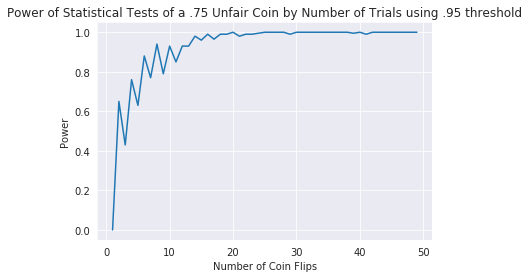

In [34]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        #print(sigma)
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
        print(np.abs(z), st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')
powers

As you can see, the statistical power of this test is wonderful once we take a sample of just 20 flips! You can also imagine how this power might change if we require a p-value of .99 to reject the null hypothesis:

In [ ]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .99 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob) # number of heads out of (n = # of flips)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5)) # binomial variance = n * p * ( 1 - p)
        z  = (n_heads - mu) / (sigma / np.sqrt(n)) 
        p_val.append(st.norm.cdf(np.abs(z)))
        print(np.abs(z), st.norm.cdf(np.abs(z)))

    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .99 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.8413447460685429
1.0 0.84134

or if we are trying to detect a only slightly unfair coin:

Text(0.5,0,'Number of Coin Flips')

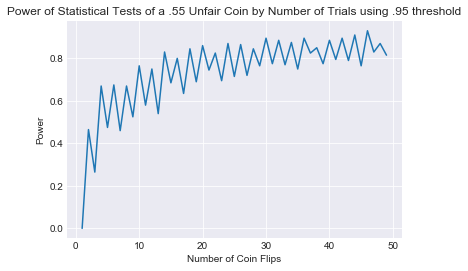

In [4]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .55
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .55 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

In [30]:
n = 100
binomial = np.random.binomial(n, unfair_coin_prob)
binomial

70

## Summary

In this lesson, we discussed the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. Remember, the power of a statistical test is the probability of rejecting the null hypothesis when it is indeed false.